#  Chapter 6, Part 2

Problems 10, 12, 13, 14, 15, 16, 18, 11

## 6.10

In [1]:
# part a
import math

c = 2
accuracy = 1e-6

def solve(c, accuracy):
    x_old = 0
    x = 1
    while abs(x - x_old) > accuracy:
        x_old = x
        x = 1 - math.exp(-c*x_old)
    return x

sol = solve(c, accuracy)

print("x =", sol)

x = 0.7968126311118457


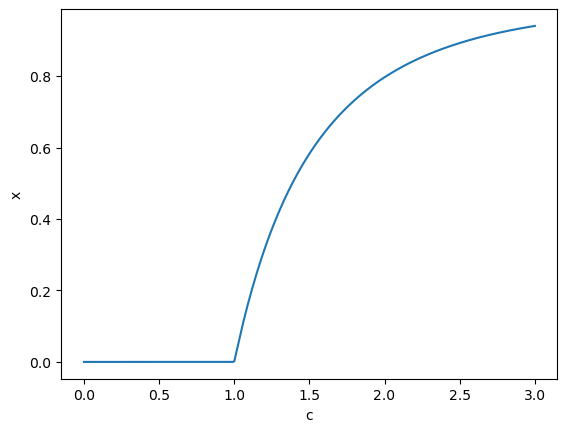

In [2]:
# part b
import numpy as np
import matplotlib.pyplot as plt
import math

def solve(c, accuracy):
    x_old = 0
    x = 1
    while abs(x - x_old) > accuracy:
        x_old = x
        x = 1 - math.exp(-c*x_old)
    return x

c_vals = np.arange(0, 3.01, 0.01)
x_vals = []

for c in c_vals:
    sol = solve(c, 1e-6)
    x_vals.append(sol)

plt.plot(c_vals, x_vals)
plt.xlabel('c')
plt.ylabel('x')
plt.show()

## 6.12

In [3]:
# part a in pdf

# part b
def f1(x, y, a):
    return -x+a*y+x**2*y

def f2(x, y, a, b):
    return b-a*y-x**2*y

def stationary_point(a, b, initial_guess=(0.1, 0.1), accuracy=1e-6, N=1000):
    x, y = initial_guess
    for i in range(N):
        x_new = y*(a + x**2)
        y_new = b/(a + x**2)
        if abs(x_new - x) < accuracy and abs(y_new - y) < accuracy:
            return x_new, y_new
        x, y = x_new, y_new
    return "Fails to converge"

a = 1
b = 2
stationary_point_result = stationary_point(a, b)
print("Stationary Point =", stationary_point_result)

Stationary Point = Fails to converge


In [4]:
# part c (the re-arranging is in pdf)

def f(x, a, b):
    return b-(a*x)/(a+x**2)-(x**3)/(a+x**2)

def find_stationary_point(a, b, initial_guesses=[0.1, 0.5, 1.0, 1.5], accuracy=1e-6, N=1000):
    for initial_guess in initial_guesses:
        x = initial_guess
        for _ in range(N):
            x_new = f(x, a, b)
            if abs(x_new - x) < accuracy:
                return x_new
            x = x_new
    print("Point not Found.")
    return None

a = 1
b = 2
stationary_point_result = find_stationary_point(a, b)
if stationary_point_result is not None:
    y = stationary_point_result / (a + stationary_point_result**2)
    print("Stationary Point =", stationary_point_result, y)

Stationary Point = 1.0 0.5


## 6.13

In [5]:
# part a in pdf

# part b
import math

def f(x):
    return 5*math.exp(-x) + x - 5

def search(f, a, b, epsilon):
    if f(a) * f(b) > 0:
        return None  
    while (b - a) / 2 > epsilon:
        midpoint = (a + b) / 2
        if f(midpoint) == 0:
            return midpoint
        elif f(a) * f(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint
    return (a + b) / 2

def displacement_constant(epsilon):
    x = search(f, 0, 10, epsilon)
    if x is not None:
        h = 6.626e-34  # Planck's constant
        c = 2.998e8  # speed of light
        kB = 1.381e-23  # Boltzmann's constant
        return h*c/(kB*x)
    else:
        return None

epsilon = 1e-6 # wanted accuracy
displacement = displacement_constant(epsilon)
if displacement is not None:
    print("Displacement constant =", displacement)
else:
    print("Constant not found")

Displacement constant = 0.0014384322363527385


In [6]:
# part c

wavelength_peak = 502e-9  # given
displacement_constant = displacement

surface_temperature = displacement_constant / wavelength_peak
print("Estimated surface temperature of the Sun is {:.2f} K".format(surface_temperature))

Estimated surface temperature of the Sun is 2865.40 K


## 6.14

C:\Users\hello\AppData\Local\Temp\ipykernel_2316\2629106157.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt((V-E)/E)
C:\Users\hello\AppData\Local\Temp\ipykernel_2316\2629106157.py:16: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((V-E)/E)
C:\Users\hello\AppData\Local\Temp\ipykernel_2316\2629106157.py:19: RuntimeWarning: invalid value encountered in sqrt
  return -np.sqrt(E/(V-E))


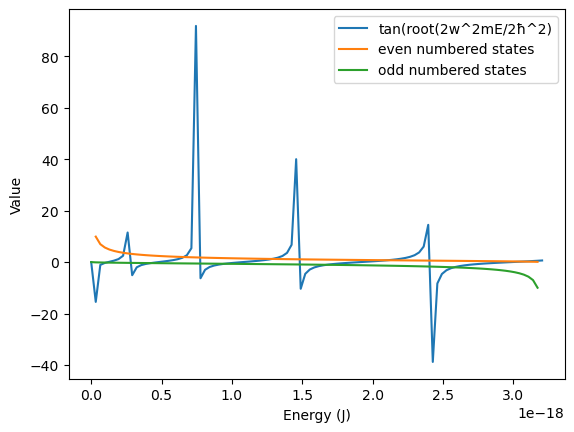

In [7]:
# part a

import numpy as np
import matplotlib.pyplot as plt

# Constants
m = 9.11e-31  # Mass of electron (kg)
h_bar = 1.05e-34  
V = 20 * 1.602e-19  # (J)
w = 1e-9  # width (m)

def y1(E):
    return np.tan(np.sqrt((2*m*E*w**2) / (2*h_bar**2)))

def y2(E):
    return np.sqrt((V-E)/E)

def y3(E):
    return -np.sqrt(E/(V-E))

E_values = np.linspace(0, 20 * 1.60218e-19, 100)  # Energies from 0 to 20 eV in Joules

y1_values = y1(E_values)
y2_values = y2(E_values)
y3_values = y3(E_values)

plt.plot(E_values, y1_values, label='tan(root(2w^2mE/2ħ^2)')
plt.plot(E_values, y2_values, label='even numbered states')
plt.plot(E_values, y3_values, label='odd numbered states')
plt.xlabel('Energy (J)')
plt.ylabel('Value')
plt.legend()
plt.show()


In [8]:
#part a

#Ground state: E = 3e-19 J
#State 1:      E = 7e-19 J
#State 2:      E = 1.11e-18 J
#State 3:      E = 1.50e-18 J
#State 4:      E = 1.80e-18 J
#State 5:      E = 2e-18 J

In [9]:
# part b

# same as part a ########
import numpy as np
import matplotlib.pyplot as plt

# Constants
m = 9.11e-31  # Mass of electron (kg)
h_bar = 1.05e-34  
V = 20 * 1.602e-19  # (J)
w = 1e-9  # width (m)

def y1(E):
    return np.tan(np.sqrt((2*m*E*w**2) / (2*h_bar**2)))

def y2(E):
    return np.sqrt((V-E)/E)

def y3(E):
    return -np.sqrt(E/(V-E))
########

def binary_search(func, low, high, tolerance=1e-6):
    while high - low > tolerance:
        mid = (low + high) / 2
        if func(mid) < 0:
            low = mid
        else:
            high = mid
    return (low + high) / 2

energies_eV = []
intersections_found = 0
E_guess = 0.01 * 1.602e-19  # Initial guess for energy in J

while intersections_found < 6:
    if intersections_found % 2 == 0:
        intersection = binary_search(lambda E: y1(E) - y2(E), E_guess, V)
    else:
        intersection = binary_search(lambda E: y1(E) - y3(E), E_guess, V)
    energies_eV.append(intersection / 1.602e-19)  # convert to eV as problem asks
    intersections_found += 1
    E_guess = intersection + 0.01 * 1.602e-19  # update guess

print("First six energy levels (eV):")
for i, energy in enumerate(energies_eV):
    print(f"Energy level {i+1}: {energy:.3f} eV") # accuracy of 0.001 as asked

First six energy levels (eV):
Energy level 1: 10.005 eV
Energy level 2: 15.008 eV
Energy level 3: 17.509 eV
Energy level 4: 18.759 eV
Energy level 5: 19.385 eV
Energy level 6: 19.697 eV


## 6.15

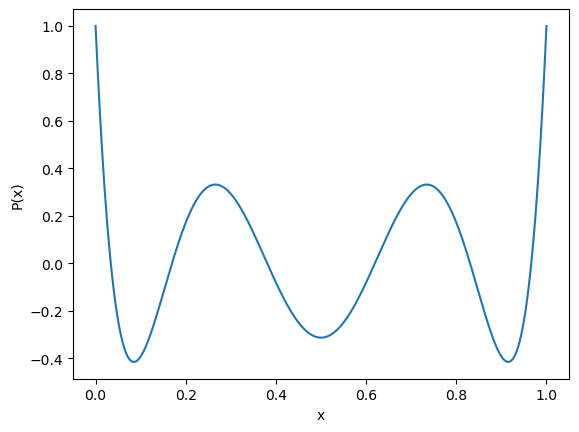

In [10]:
# part a
import numpy as np
import matplotlib.pyplot as plt

def P(x):
    return 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1

x_values = np.linspace(0, 1, 1000)
y_values = P(x_values)

plt.plot(x_values, y_values, label='P(x)')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

In [11]:
# part b
import numpy as np

def P(x):
    return 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1

def dP(x): #derivative
    return 5544*x**5 - 13860*x**4 + 12600*x**3 - 5040*x**2 + 840*x - 42

# finding roots
def find_roots(f, df, x0, accuracy=1e-10, N=1000): # accuracy = 10th decimal place
    x = x0
    for _ in range(N):
        fx = f(x)
        if abs(fx) < accuracy:
            return x
        dfx = df(x)
        if dfx == 0:
            break
        x = x - fx / dfx
    return None

roots = [] # find the roots
for _ in range(6):
    root = find_roots(P, dP, np.random.random())
    if root is not None:
        roots.append(root)

for i, root in enumerate(roots): #printing the roots
    print(f"Root {i+1}: {root:.10f}")


Root 1: 0.9662347571
Root 2: 0.3806904070
Root 3: 0.8306046932
Root 4: 0.0337652429
Root 5: 0.9662347571
Root 6: 0.6193095930


## 6.16

In [12]:
#part a in pdf

#part b

# constants
G = 6.674 * 10**-11  # m^3/kg/s^2
M = 5.974 * 10**24   # kg
m = 7.348 * 10**22   # kg
R = 3.844 * 10**8    # m
omega = 2.662 * 10**-6  # s^-1

def f(r):
    return G * M / r**2 - G * m / (R - r)**2 - omega**2 * r

def secant_method(f, x0, x1, tol=1e-8, max_iter=1000):
    for _ in range(max_iter):
        x_next = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        if abs(x_next - x1) < tol:
            return x_next
        x0, x1 = x1, x_next
    raise ValueError("Did not converge")

# Initial guesses for r
x0 = R / 4
x1 = R / 3

# Solve using secant method
solution = secant_method(f, x0, x1)

print("r =", solution, "m")

r = 326045071.66535544 m


## 6.18

C:\Users\hello\AppData\Local\Temp\ipykernel_2316\3792871780.py:19: RuntimeWarning: overflow encountered in exp
  integrand = lambda x: x**3 / (np.exp(x) - 1)


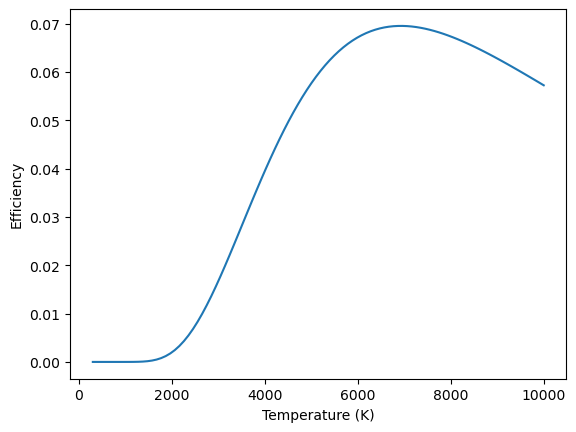

In [13]:
# part a
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

# constants
h = 6.626e-34  # Planck's constant
c = 2.998e8  # Speed of light
kB = 1.381e-23  # Boltzmann's constant
λ1 = 390e-9 
λ2 = 750e-9

def I(λ, T): # equation
    x = h * c / (λ * kB * T)
    return 2 * np.pi * h * c**2 / λ**5 / (np.exp(x) - 1)

# efficiency function
def efficiency(T):
    integrand = lambda x: x**3 / (np.exp(x) - 1)
    numerator, _ = spi.quad(integrand, h * c / (λ2 * kB * T), h * c / (λ1 * kB * T))
    denominator, _ = spi.quad(integrand, 0, np.inf)
    return (15 / np.pi**4) * numerator / denominator


temperatures = np.linspace(300, 10000, 100)
efficiencies = [efficiency(T) for T in temperatures]
plt.plot(temperatures, efficiencies)
plt.xlabel('Temperature (K)')
plt.ylabel('Efficiency')
plt.show()

In [14]:
# part b
import numpy as np
import scipy.integrate as spi

# constants
h = 6.626e-34  # Planck's constant
c = 2.998e8  # Speed of light
kB = 1.381e-23  # Boltzmann's constant
λ1 = 390e-9 
λ2 = 750e-9

def efficiency(T):
    # integration limits
    x_min = h * c / (λ2 * kB * T)
    x_max = h * c / (λ1 * kB * T)
    
    # integrate
    integrand = lambda x: x**3 / (np.exp(x) - 1)
    numerator, _ = spi.quad(integrand, x_min, x_max)
    denominator, _ = spi.quad(integrand, 0, np.inf)
    
    return -(15 / np.pi**4) * numerator / denominator

# Golden ratio search
def golden_ratio_search(func, a, b, accuracy=1e-3):
    phi = (1 + np.sqrt(5)) / 2
    while abs(b - a) > accuracy:
        x1 = b - (b - a) / phi
        x2 = a + (b - a) / phi
        if func(x1) < func(x2):  # searching for minimum
            a = x1
        else:
            b = x2
    return (a + b) / 2

def neg_efficiency(T): # making negative
    return -efficiency(T)

# Initial search interval
a = 300  # lower bound
b = 10000  # upper bound

# golden ratio search
max_efficiency_temp = golden_ratio_search(neg_efficiency, a, b)

print("Maximum efficiency temp is: {:.2f} K".format(max_efficiency_temp))

Maximum efficiency temp is: 6926.92 K


C:\Users\hello\AppData\Local\Temp\ipykernel_2316\18061963.py:18: RuntimeWarning: overflow encountered in exp
  integrand = lambda x: x**3 / (np.exp(x) - 1)


part c

It would not be practical to run a tungeston-filament lightbulb at the temperature above because:
The temperature is much higher than the melting and boiling point of tungeston.
It would require a lot of energy to power it at that temperature.
It would not last very long.
It would be unsafe.

## 6.11

In [15]:
# taken from 6.10

# part a is in pdf

# part b

import math

c = 2
accuracy = 1e-6

def solve(c, accuracy):
    x_old = 0
    x = 1
    num_iterations = 0
    while abs(x - x_old) > accuracy:
        x_old = x
        x = 1 - math.exp(-c*x_old)
        num_iterations += 1
    return x, num_iterations

sol, iterations = solve(c, accuracy)

print("x =", sol)
print("Number of iterations:", iterations)

x = 0.7968126311118457
Number of iterations: 14


In [16]:
# part c

import math

c = 2
accuracy = 1e-6

def overrelaxation(c, accuracy, omega):
    x_old = 0
    x = 1
    num_iterations = 0
    while True:
        x_old = x
        x_prime = 1 - math.exp(-c * x_old)
        x = x_old + (1 + omega) * (x_prime - x_old)
        num_iterations += 1
        if abs(x - x_old) < accuracy:
            break
    return x, num_iterations

omega = 0.5  # given value of omega to start with
sol, iterations = overrelaxation(c, accuracy, omega)

print("omega:", omega)
print("x =", sol)
print("Number of iterations:", iterations)


omega: 0.5
x = 0.7968121566399139
Number of iterations: 5


part d:

Yes because a negative value of omega can be faster when a function has concave regions because under-relaxation can be used.